In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse_sk
from sklearn.metrics import mean_absolute_error as mae_sk
from sklearn.metrics import max_error
from sklearn.model_selection import train_test_split

In [ ]:
def create_dataset(dataset, data_mode='valid',look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    #print("TENSORS OF X: ",dataX)
    #print("TENSORS OF Y: ",dataY)
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  print(len(dataX),len(dataX[0]),len(dataY))
  return np.array(dataX), np.array(dataY)


In [ ]:
def preprocess_df(data,mode='full',look_back = 24):
  dataset = data.values
  dataset = dataset.astype('float32')
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  dataset.shape
  if mode=='minimal':
    X,Y=create_dataset(dataset[:,:],look_back=look_back)
    print("X_shape in preprocess: {} y_shape in preprocess: {}".format(X.shape,Y.shape))
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    return X,Y,scaler
  #train, test, valid = dataset[0:train_size, :], dataset[train_size:test_size, :],dataset[test_size: ,:]  
  train, test, valid = dataset[0:17500, :], dataset[17500:19000, :],dataset[19000: ,:]
  #train,test,valid=train_test_split(dataset)
  print(len(train), len(test),len(valid))
  print(train.shape,test.shape)
  trainX, trainY = create_dataset(train, data_mode='train',look_back=look_back)
  testX, testY = create_dataset(test, data_mode='test',look_back=look_back)
  validX,validY=create_dataset(valid, data_mode='valid',look_back=look_back)
  print(trainX.shape,trainY.shape)
  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  validX = np.reshape(validX, (validX.shape[0], 1, validX.shape[1]))
  print(trainX.shape,trainY.shape)
  return {'trainX':trainX,'trainY':trainY,'testX':testX,'testY':testY,'validX':validX,'validY':validY},scaler

In [ ]:
data=pd.read_json("BTC-USDT_1h.json")
#data=data[['high']]
#data=data.diff()
#data=data[1:]
data.shape

(25639, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25639 entries, 0 to 25638
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   open_time  25639 non-null  datetime64[ns]
 1   high       25639 non-null  float64       
 2   low        25639 non-null  float64       
 3   close      25639 non-null  float64       
 4   volume     25639 non-null  float64       
 5   date       25639 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 1.2 MB


In [ ]:
#data=data[['date','high']]
data=data[['open_time','high']]

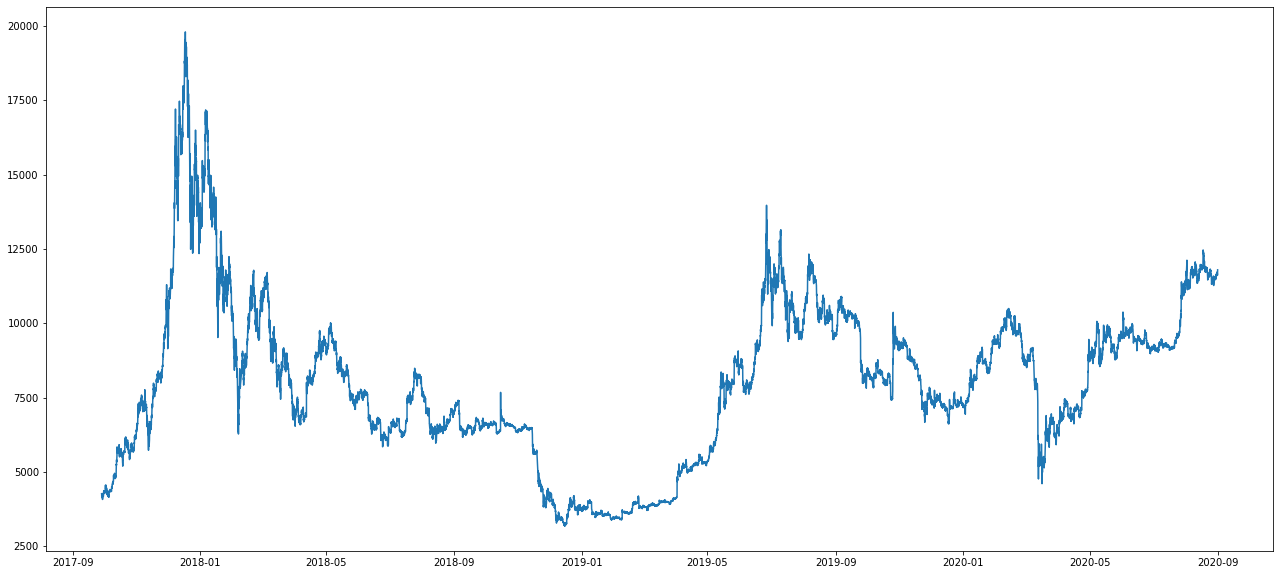

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(data['open_time'],data['high'])
plt.savefig("highplot.png")

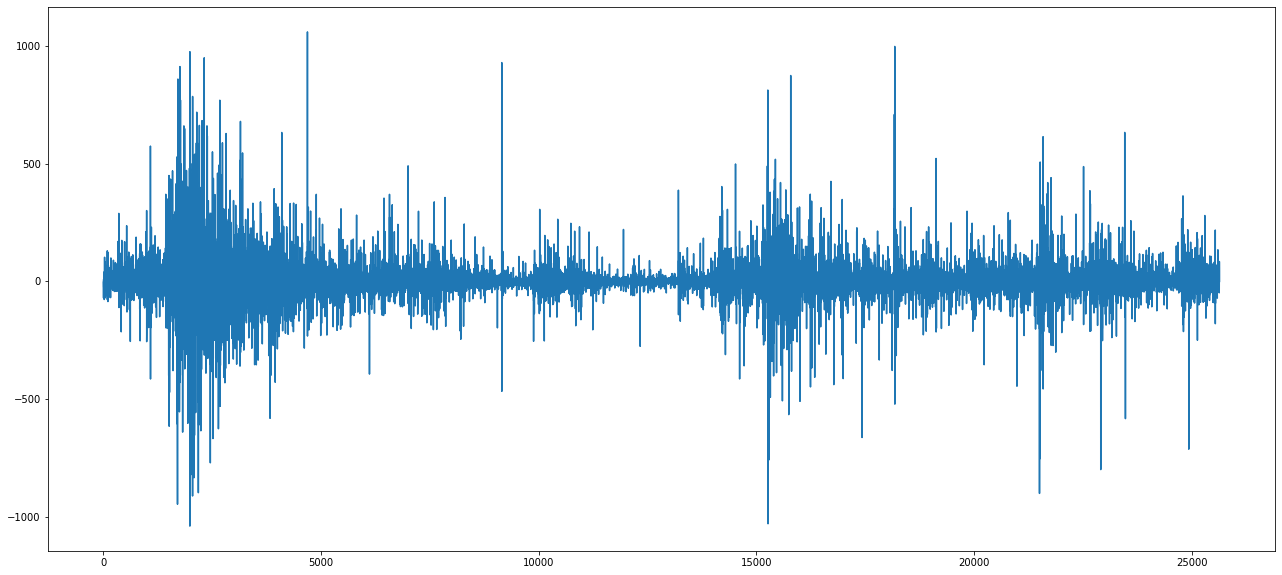

In [ ]:
plt.figure(figsize=(22,10))
plt.plot(data['high'].diff())
#plt.plot(data['high'].iloc[0:1000].diff())
plt.savefig("diffplot.png")

In [ ]:
look_back=8
dataDic,scaler=preprocess_df(data,mode='full',look_back=look_back)
for name in dataDic:
  globals()[name] = dataDic[name]

17500 1500 6639
(17500, 1) (1500, 1)
17491 8 17491
1491 8 1491
6630 8 6630
(17491, 8) (17491,)
(17491, 1, 8) (17491,)


In [ ]:
model = keras.models.Sequential([    
# BEOFRE: 20   
keras.layers.RNN(keras.layers.LSTMCell(30), return_sequences=True,input_shape=[None, look_back]),   
# BEOFRE: 20   

  keras.layers.RNN(keras.layers.LSTMCell(30),return_sequences=True), 
  #keras.layers.Dense(1,kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=1e-4) )  
  #keras.layers.TimeDistributed(keras.layers.Dense(1))
  keras.layers.TimeDistributed(keras.layers.Dense(1,kernel_regularizer=keras.regularizers.l1_l2(l1=0.0016, l2=1e-4)))
])

In [ ]:
model=keras.models.load_model("lstmmodelof3.h5")

In [ ]:
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
history=model.fit(trainX, trainY , epochs=15)
#history=model.fit(trainX, trainY,validation_split=0.33 , epochs=15)

Epoch 1/15
547/547 [==============================] - 4s 7ms/step - loss: 0.0122 - accuracy: 1.1434e-04
Epoch 2/15
547/547 [==============================] - 4s 7ms/step - loss: 0.0025 - accuracy: 1.1434e-04
Epoch 3/15
547/547 [==============================] - 4s 7ms/step - loss: 0.0024 - accuracy: 1.1434e-04
Epoch 4/15
547/547 [==============================] - 4s 7ms/step - loss: 0.0023 - accuracy: 1.1434e-04
Epoch 5/15
547/547 [==============================] - 4s 7ms/step - loss: 0.0023 - accuracy: 1.1434e-04
Epoch 6/15
547/547 [==============================] - 4s 7ms/step - loss: 0.0022 - accuracy: 1.1434e-04
Epoch 7/15
547/547 [==============================] - 4s 7ms/step - loss: 0.0021 - accuracy: 1.1434e-04
Epoch 8/15
547/547 [==============================] - 4s 7ms/step - loss: 0.0019 - accuracy: 1.1434e-04
Epoch 9/15
547/547 [==============================] - 4s 7ms/step - loss: 0.0018 - accuracy: 1.1434e-04
Epoch 10/15
547/547 [==============================] - 4s 7ms/st

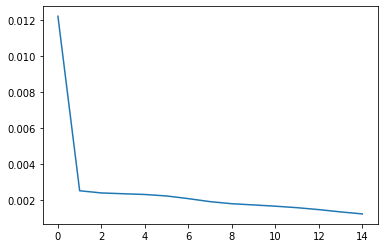

In [ ]:
#plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.savefig("lossplot.png")
#plt.plot(history.history['val_loss'])

In [ ]:
#model.save("lstmmodelof3.h5")
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
#Y_pred=model.predict(testX)
Y_pred=model.predict(validX)
#Y_pred=model.predict(trainX)
#Y_pred=model.predict(testX)

In [ ]:
Y_pred

validX

array([[[0.26175204, 0.26181945, 0.2650938 , ..., 0.26695368,
         0.27645296, 0.2771921 ]],

       [[0.26181945, 0.2650938 , 0.2657559 , ..., 0.27645296,
         0.2771921 , 0.2795997 ]],

       [[0.2650938 , 0.2657559 , 0.26340848, ..., 0.2771921 ,
         0.2795997 , 0.2808035 ]],

       ...,

       [[0.5118717 , 0.5128974 , 0.5113553 , ..., 0.50843894,
         0.50758314, 0.50806344]],

       [[0.5128974 , 0.5113553 , 0.5113733 , ..., 0.50758314,
         0.50806344, 0.51313865]],

       [[0.5113553 , 0.5113733 , 0.51135886, ..., 0.50806344,
         0.51313865, 0.5160278 ]]], dtype=float32)

In [ ]:
Y_pred=Y_pred.reshape((-1,1))
validY=validY.reshape((-1,1))

Y_pred=scaler.inverse_transform(X=Y_pred)
#trainY=trainY.reshape((-1,1))
#trainY=scaler.inverse_transform(X=trainY)

testY=testY.reshape((-1,1))
#trainY=trainY.reshape((-1,1))
if testY[0]<1:
  testY=scaler.inverse_transform(X=testY)
#if trainY[0]<1:
#  trainY=scaler.inverse_transform(X=trainY)
if validY[0]<1:
  validY=scaler.inverse_transform(X=validY)

In [ ]:
validY,Y_pred

(array([[ 7830.   ],
        [ 7850.   ],
        [ 7758.4  ],
        ...,
        [11709.999],
        [11757.999],
        [11800.77 ]], dtype=float32), array([[ 7686.4785],
        [ 7730.8545],
        [ 7759.5317],
        ...,
        [11598.067 ],
        [11642.326 ],
        [11692.065 ]], dtype=float32))

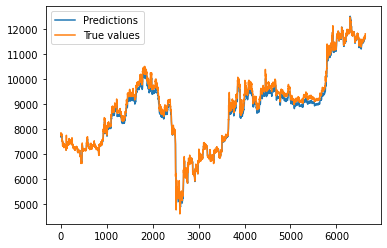

In [ ]:

#validY=validY.reshape((-1,1))

#validY=scaler.inverse_transform(X=validY)
plt.plot(Y_pred, label="Predictions")
#plt.plot(trainY)
plt.plot(validY, label="True values")
plt.legend(loc="upper left")
plt.savefig("validplot.png")

In [ ]:
#print(mse_sk(testY,Y_pred))
#print(mse_sk(testY,Y_pred), mae_sk(testY,Y_pred),max_error(testY,Y_pred))
#print(mse_sk(trainY,Y_pred), mae_sk(trainY,Y_pred),max_error(trainY,Y_pred))
print(mse_sk(validY,Y_pred), mae_sk(validY,Y_pred),max_error(validY,Y_pred))
len(trainY),len(Y_pred)

23136.797 122.62429 950.9951


(17491, 6630)

In [ ]:
len(Y_pred)

6614

In [ ]:
#XFull=data[['high']]
XFull=data
print(len(XFull))
test_size=len(XFull)-24
X,Y,scaler=preprocess_df(XFull.iloc[:test_size],mode='minimal',look_back=look_back)
#Xtest2,yTest2,scaler=preprocess_df(XFull[test_size:],mode='minimal')
print(len(X), len(Y))
print(X.shape,Y.shape)

25639
25606 8 25606
X_shape in preprocess: (25606, 8) y_shape in preprocess: (25606,)
25606 25606
(25606, 1, 8) (25606,)


In [ ]:
#preds=np.array([])
preds=[]
i=test_size
end=len(XFull)
while i<end:
  #print(X.shape)
  if i!=0: Y=model.predict(X)
  print(Y[-1])
  #preds=np.append(preds,Y[-1])
  preds.append(Y[-1][0])
  new_tensor=np.append(X[-1][0][1:],preds[-1])
  #new_tensor=np.array([X[-1][0][1],preds[-1]])
  print(new_tensor)
  new_tensor=new_tensor.reshape((1,1,len(new_tensor)))
  X=np.concatenate((X,new_tensor))
  #X=np.append(X,preds[-1])
  print(i, ":", end)
  i+=1

[[0.5050252]]
[0.50688064 0.5064497  0.50730324 0.5063125  0.5056931  0.507007
 0.50746334 0.5050252 ]
25615 : 25639
[[0.50410926]]
[0.5064497  0.50730324 0.5063125  0.5056931  0.507007   0.50746334
 0.5050252  0.50410926]
25616 : 25639
[[0.5029439]]
[0.50730324 0.5063125  0.5056931  0.507007   0.50746334 0.5050252
 0.50410926 0.5029439 ]
25617 : 25639
[[0.5016256]]
[0.5063125  0.5056931  0.507007   0.50746334 0.5050252  0.50410926
 0.5029439  0.5016256 ]
25618 : 25639
[[0.5002996]]
[0.5056931  0.507007   0.50746334 0.5050252  0.50410926 0.5029439
 0.5016256  0.5002996 ]
25619 : 25639
[[0.49867412]]
[0.507007   0.50746334 0.5050252  0.50410926 0.5029439  0.5016256
 0.5002996  0.49867412]
25620 : 25639
[[0.49688533]]
[0.50746334 0.5050252  0.50410926 0.5029439  0.5016256  0.5002996
 0.49867412 0.49688533]
25621 : 25639
[[0.4951445]]
[0.5050252  0.50410926 0.5029439  0.5016256  0.5002996  0.49867412
 0.49688533 0.4951445 ]
25622 : 25639
[[0.4931658]]
[0.50410926 0.5029439  0.5016256  0.5

In [ ]:
mse_sk(trueY,predsY), mae_sk(trueY,predsY), max_error(trueY,predsY)

(1207299.9749418944, 959.8412353515627, 1967.9487109375004)

In [ ]:
preds

[0.5126925,
 0.5152256,
 0.518232,
 0.520717,
 0.52375716,
 0.52686274,
 0.5306468,
 0.5336612,
 0.5367507,
 0.54042405,
 0.5439489,
 0.5477717,
 0.55149114,
 0.5552835,
 0.5591971,
 0.56310093,
 0.5674688,
 0.57164264,
 0.576327,
 0.5807186,
 0.5853565,
 0.59007514,
 0.5949981,
 0.5999684]

In [ ]:
predsY=np.array(preds)
predsY=predsY.reshape((-1,1))
predsY.shape
predsY=scaler.inverse_transform(predsY)

In [ ]:
i=1
trueY=[]
while i<=len(predsY):
  print(predsY[-i]," : ", XFull['high'].iloc[-i])
  trueY.append(XFull['high'].iloc[-i])
  i+=1
trueY=list(reversed(trueY))
print(len(trueY),len(predsY))

[10473.768]  :  11800.77
[10564.724]  :  11800.77
[10650.748]  :  11758.0
[10731.8545]  :  11710.0
[10808.135]  :  11625.68
[10879.689]  :  11617.7
[10946.68]  :  11631.92
[11009.325]  :  11680.43
[11067.773]  :  11680.67
[11122.264]  :  11680.37
[11173.104]  :  11705.99
[11220.214]  :  11688.95
[11264.125]  :  11699.54
[11305.107]  :  11704.99
[11342.899]  :  11726.89
[11378.173]  :  11719.0
[11411.046]  :  11664.69
[11439.968]  :  11645.04
[11469.6875]  :  11658.88
[11496.691]  :  11655.98
[11518.723]  :  11655.18
[11540.624]  :  11674.12
[11559.985]  :  11685.0
[11575.204]  :  11658.99
24 24


In [ ]:
len(trueY), len(predsY)
predsY=np.array([predsY[i][0] for i in range(len(predsY))])
predsY=predsY.reshape((-1,1))

In [ ]:
#predsY=np.array(preds)
#print(predsY.shape)
#predsY=np.reshape(predsY,(-1,1))
#predsY=scaler.inverse_transform(X=predsY)
#_true=[X[i][0][-1] for i in range(len(X)-24,len(X))]
#plt.ylim((8000,12000))
plt.plot(predsY,label="Predictions")
plt.plot(trueY,label="Real values")
plt.legend()
plt.savefig("predtrueplot2.png")
#print(predsY[5][1])
#plt.plot(y_true)
#plt.plot(XFull.iloc[test_size:])
